In [1]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt 
import seaborn as sns

pd.options.display.max_columns = 1000
pd.options.display.max_rows = 1000


path_submissions = '/'
target_name = 'target'
scores_folds = {}

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
QuickRun = True #this is meant for running experminets before the final run

/kaggle/input/tabular-playground-series-nov-2021/sample_submission.csv
/kaggle/input/tabular-playground-series-nov-2021/train.csv
/kaggle/input/tabular-playground-series-nov-2021/test.csv


#### The dataset is used for this competition is synthetic, but based on a real dataset and generated using a CTGAN. The original dataset deals with predicting identifying spam emails via various extracted features from the email. Although the features are anonymized, they have properties relating to real-world features.

The goal of these competitions is to provide a fun, and approachable for anyone, tabular dataset. These competitions will be great for people looking for something in between the Titanic Getting Started competition and a Featured competition. If you're an established competitions master or grandmaster, these probably won't be much of a challenge for you. We encourage you to avoid saturating the leaderboard.

In [2]:
nrows = 10000 if QuickRun else None

train=pd.read_csv("/kaggle/input/tabular-playground-series-nov-2021/train.csv", nrows = nrows)
test=pd.read_csv("/kaggle/input/tabular-playground-series-nov-2021/test.csv", nrows = nrows)

In [3]:
train.describe()

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,0.241447,2.334074,305.418429,2.868106,0.083669,2.278749,2.426042,2.263425,2.709598,0.137223,2.297338,2.599197,0.156223,2.230556,2.928094,2.760911,0.364635,2.635437,2.395122,0.093979,0.046306,0.061559,2.396630,0.178246,0.122989,2.976590,2.510734,0.022249,0.164903,2.362116,0.157260,0.158805,0.173445,0.043072,2.306781,39.808729,1.848968,2.180400,2.393580,0.690059,2.742544,2.762647,0.140390,2.142559,2.498752,2.511472,0.078485,2.594033,0.090244,0.239815,2.228824,0.086332,0.325784,0.171438,2.288282,2.774812,0.197457,2.403616,0.126739,0.060307,0.071629,0.088221,0.165075,0.279017,0.096143,2.283515,2.208290,2.806362,0.053253,0.136900,2.428503,2.715134,0.143764,0.047679,2.603156,0.119581,0.225115,2.549351,0.090869,0.286779,2.814993,0.723189,2.705842,0.208496,0.402224,2.832540,2.589291,0.267307,0.429018,0.068749,0.071953,2.670043,0.129082,0.066706,0.218353,0.182673,2.402031,2.774349,0.115939,0.110290,0.416800
std,2886.89568,0.472841,1.562380,568.420356,1.498980,0.258401,1.507486,1.539438,1.557278,1.545036,0.430365,1.538336,1.528443,0.229504,1.450316,1.443996,1.516363,1.425556,1.564743,1.519143,0.342637,0.154355,0.059438,1.602639,0.567921,0.261399,1.616070,1.575206,0.108811,0.316008,1.525782,0.339216,0.610150,0.458806,0.092431,1.582906,75.672640,1.866231,1.548505,1.625031,0.967796,1.591205,1.551674,0.368697,1.525650,3.626307,1.597151,0.405172,1.528820,0.308057,0.616852,1.574166,0.235199,0.601060,0.271506,1.528754,1.501653,0.679522,1.512063,0.651890,0.300296,0.126140,0.249676,0.416003,0.530150,0.230988,1.545889,1.552993,1.552745,0.199680,0.578857,1.596215,1.558288,0.396044,0.046305,1.471456,0.564879,1.322352,1.517143,0.213248,0.487260,1.583939,1.112453,1.476352,0.331625,2.021475,1.559139,1.574346,0.520600,1.087247,0.159317,0.069600,1.588484,0.491734,0.103318,0.520362,0.281124,1.524535,1.507877,0.355769,0.245422,0.493054
min,0.00000,-2.235310,-0.984831,-1184.660000,-1.136330,-1.740910,-0.973796,-0.958169,-1.187380,-0.920259,-1.220050,-1.309730,-1.244080,-0.501496,-1.092900,-0.888188,-0.916070,-4.020660,-0.826452,-1.156190,-3.842450,-1.482870,-0.087655,-1.051650,-2.172560,-1.007220,-1.380430,-0.939936,-0.284561,-3.876140,-1.076970,-1.105130,-2.450490,-0.881257,-1.152300,-1.157250,-293.527000,-2.106770,-1.139790,-0.989201,-1.140

In [4]:
train.isnull().sum().sum()

0

In [5]:
colNames=[col for col in test.columns if col not in 'id']

In [6]:
!pip install hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 7.8 MB/s eta 0:00:0000:0100:010m
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=3425833 sha256=ec3ecb6a823e491e64f7b653951f6fd4b0215d8aab109f560af20ec93a7c2670
  Stored in directory: /root/.cache/pip/wheels/6e/7a/5e/259ccc841c085fc41b99ef4a71e896b62f5161f2bc8a14c97a
Successfully built hdbscan


In [7]:
%%time

from sklearn.preprocessing import StandardScaler
import hdbscan
import umap

scaler = StandardScaler()

X = scaler.fit_transform(train[colNames])

reducer = umap.UMAP(random_state=42, n_components=2)
embedding = reducer.fit_transform(X)

clusterer = hdbscan.HDBSCAN(prediction_data=True, min_cluster_size = 250).fit(embedding)

u, counts = np.unique(clusterer.labels_, return_counts=True)

print(u)
print(counts)

[-1]
[10000]
CPU times: user 59.5 s, sys: 2.09 s, total: 1min 1s
Wall time: 1min 3s


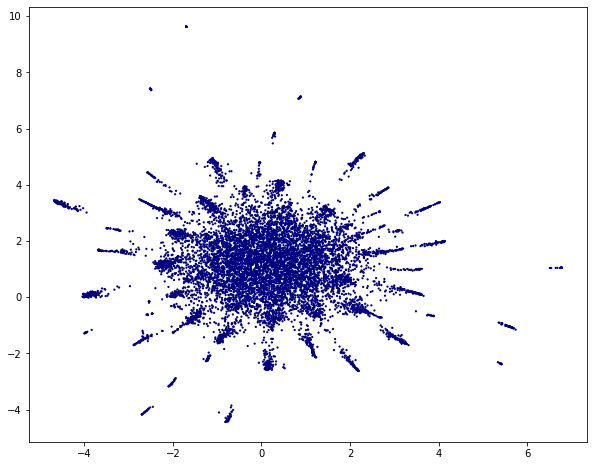

In [8]:


plt.figure(figsize=(10, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], s=5, c=clusterer.labels_, edgecolors='none', cmap='jet');



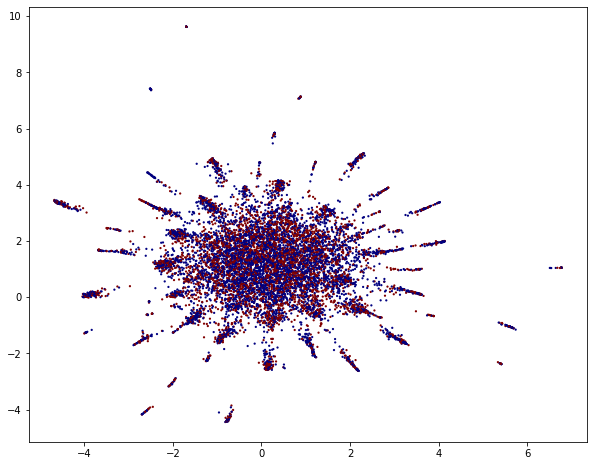

In [9]:


plt.figure(figsize=(10, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], s=5, c=train.target, edgecolors='none', cmap='jet');



In [10]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X = scaler.fit_transform(train[colNames])

reducer = umap.UMAP(random_state=42, n_components=2)
embedding = reducer.fit_transform(X)
clusterer = hdbscan.HDBSCAN(prediction_data=True, min_cluster_size = 10).fit(embedding)

u, counts = np.unique(clusterer.labels_, return_counts=True)

print(u)
print(counts)

[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70
 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94
 95 96 97]
[1611   13   20   32  188   30   52   40   16   36   45  174   69   12
   51   19  209   53   84  192  188  161   16   91   25   27   39   36
   31   26  106  422   27  102   47   30   41   32   21   86   38   17
   15  245   17  330  294  530  157   11  300  317  281  128  150   23
   14  183   14   20  138   25   15  212   63   79   18  107   11   71
   12   22   43  186   15   90  117   11   34   33   72   94   17   36
   14   11   98   13   17   87   54   54   72   11   69   45   33   15
  302]


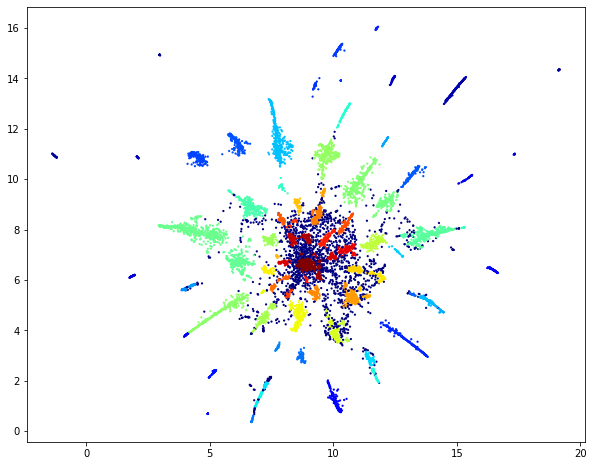

In [11]:
plt.figure(figsize=(10, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], s=5, c=clusterer.labels_, edgecolors='none', cmap='jet');

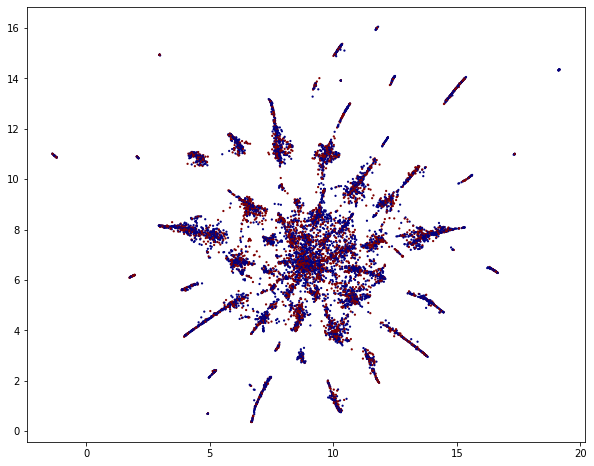

In [12]:


plt.figure(figsize=(10, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], s=5, c=train.target, edgecolors='none', cmap='jet');



In [13]:
table_target = pd.crosstab(clusterer.labels_,train.target)

In [14]:
proba = table_target.iloc[:,1] / table_target.sum(axis=1)

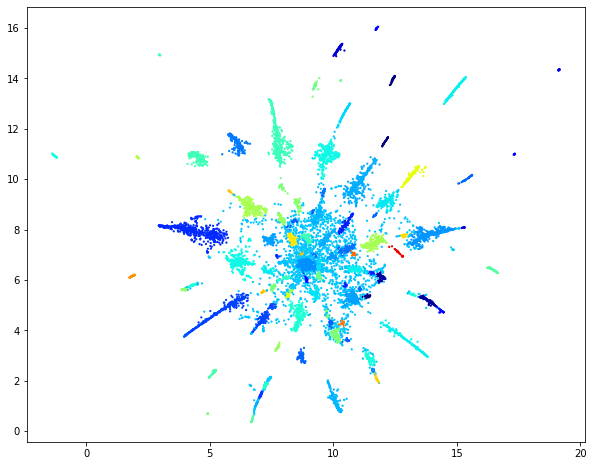

In [15]:
plt.figure(figsize=(10, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], s=5, c=[proba[i] for i in clusterer.labels_], edgecolors='none', cmap='jet',vmin=0.25,vmax=0.75);

In [16]:


Xtest = scaler.transform(test[colNames])
embedding_test = reducer.transform(Xtest)
test_labels, strengths = hdbscan.approximate_predict(clusterer, embedding_test)
test_proba = [proba[i] for i in test_labels]



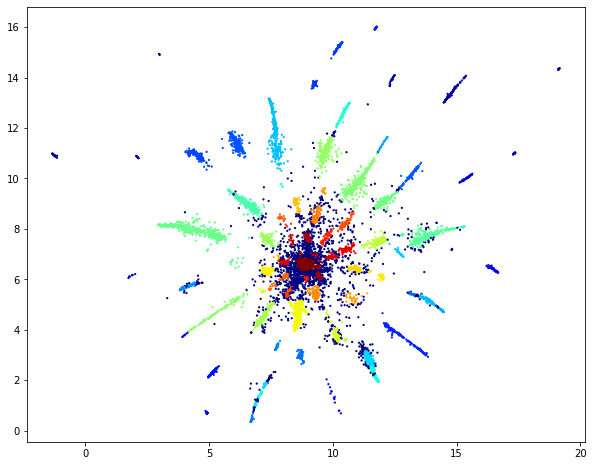

In [17]:


plt.figure(figsize=(10, 8))
plt.scatter(embedding_test[:, 0], embedding_test[:, 1], s=5, c=test_labels, edgecolors='none', cmap='jet');



In [18]:


sub=pd.read_csv("../input/tabular-playground-series-nov-2021/sample_submission.csv",nrows = nrows)
sub['target']=test_proba
sub.to_csv("submission.csv",index=False)

